
# Wi-Fi Random Topology Simulation Analysis

This Jupyter Notebook analyzes NS-3 simulation results for a **Wi-Fi Random Topology** scenario.
It visualizes throughput, RSSI, and loss patterns, and summarizes performance degradation due to interference.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV files (adjust paths if necessary)
perf_df = pd.read_csv("../outputs/wifi-random-perf.csv")
rssi_df = pd.read_csv("../outputs/wifi-random-rssi.csv")


In [4]:
# Clean column names
perf_df.columns = [c.strip() for c in perf_df.columns]
rssi_df.columns = [c.strip() for c in rssi_df.columns]


In [5]:

perf_df.head()


,FlowID,Source,Destination,Throughput(Mbps),Latency_avg(ms),Jitter_avg(ms),PacketLoss(%)
0,1,10.1.4.1,10.1.4.3,0.000000,0.00000,0.00000,100.0000
1,2,10.1.4.2,10.1.4.3,0.000000,0.00000,0.00000,100.0000
2,3,10.1.3.1,10.1.3.8,0.845912,19.74720,6.60006,99.8929
3,4,10.1.3.2,10.1.3.8,0.018282,2.57143,2.59898,98.9643
4,5,10.1.3.3,10.1.3.8,0.000000,0.00000,0.00000,100.0000


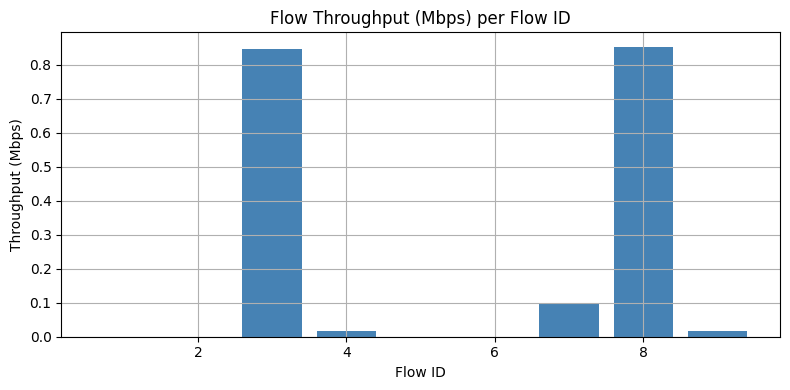

In [6]:
# === Figure 1: Flow Throughput per Flow ID ===
plt.figure(figsize=(8,4))
plt.bar(perf_df["FlowID"], perf_df["Throughput(Mbps)"], color="steelblue")
plt.title("Flow Throughput (Mbps) per Flow ID")
plt.xlabel("Flow ID")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
# plt.savefig("plot_throughput.png")  # Uncomment to save

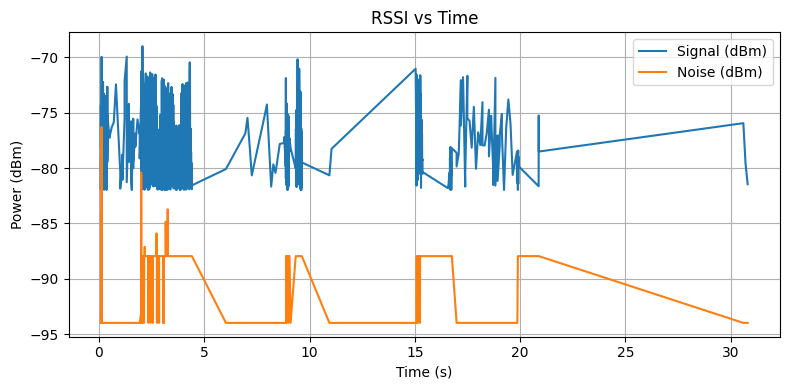

In [8]:
# === Figure 2: RSSI vs Time ===
plt.figure(figsize=(8,4))
plt.plot(rssi_df["time_s"], rssi_df["signal_dBm"], label="Signal (dBm)")
plt.plot(rssi_df["time_s"], rssi_df["noise_dBm"], label="Noise (dBm)")
plt.title("RSSI vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Power (dBm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [9]:
# plt.savefig("plot_rssi.png")

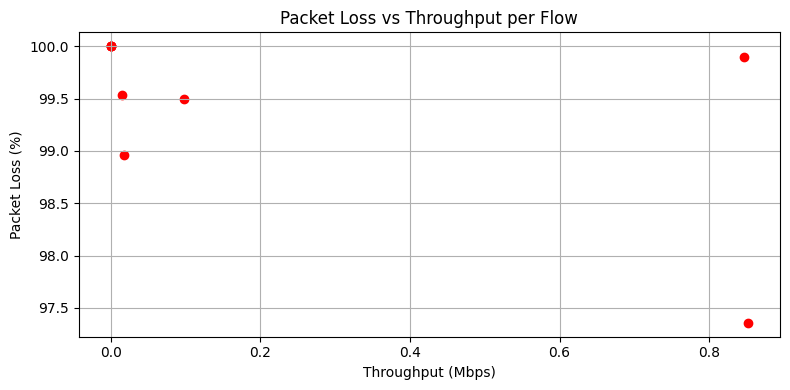

In [10]:

# === Figure 3: Packet Loss vs Throughput ===
plt.figure(figsize=(8,4))
plt.scatter(perf_df["Throughput(Mbps)"], perf_df["PacketLoss(%)"], color="red")
plt.title("Packet Loss vs Throughput per Flow")
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Packet Loss (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
# plt.savefig("plot_loss_vs_throughput.png")

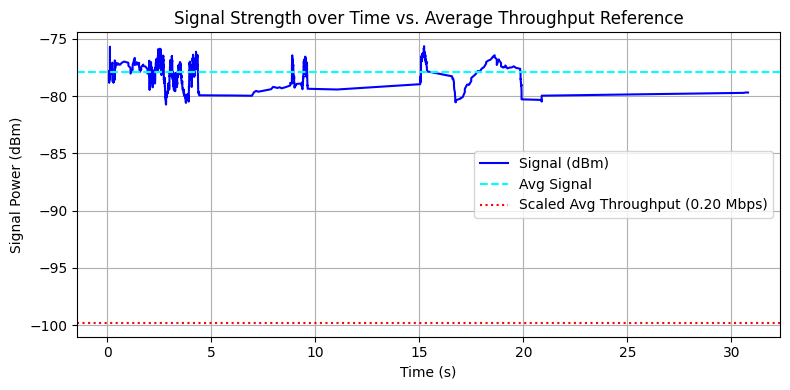

In [12]:

# === Figure 4: Signal Strength over Time vs Average Throughput ===
rssi_df_sorted = rssi_df.sort_values("time_s")
rssi_df_sorted["signal_avg"] = rssi_df_sorted["signal_dBm"].rolling(window=20, min_periods=1).mean()
avg_throughput = perf_df["Throughput(Mbps)"].mean()

plt.figure(figsize=(8,4))
plt.plot(rssi_df_sorted["time_s"], rssi_df_sorted["signal_avg"], label="Signal (dBm)", color="blue")
plt.axhline(y=rssi_df_sorted["signal_avg"].mean(), color="cyan", linestyle="--", label="Avg Signal")
plt.axhline(y=avg_throughput - 100, color="red", linestyle=":", label=f"Scaled Avg Throughput ({avg_throughput:.2f} Mbps)")
plt.title("Signal Strength over Time vs. Average Throughput Reference")
plt.xlabel("Time (s)")
plt.ylabel("Signal Power (dBm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [13]:
# plt.savefig("plot_timeline.png")

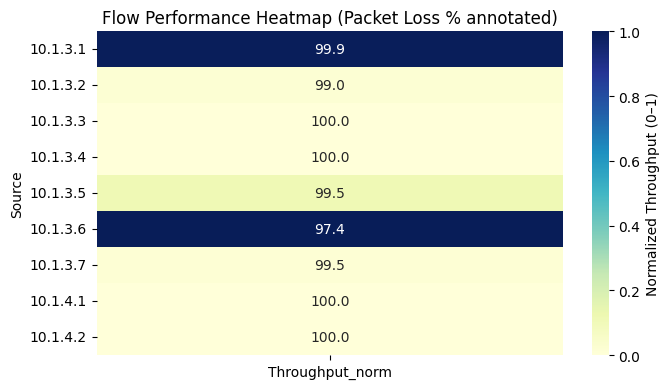

In [14]:

# === Figure 5: Flow Performance Heatmap ===
heatmap_data = perf_df.pivot_table(index="Source", values=["Throughput(Mbps)", "PacketLoss(%)"], aggfunc="mean")
heatmap_data["Throughput_norm"] = heatmap_data["Throughput(Mbps)"] / max(heatmap_data["Throughput(Mbps)"].max(), 1e-6)

plt.figure(figsize=(7,4))
sns.heatmap(
    heatmap_data[["Throughput_norm"]],
    annot=heatmap_data[["PacketLoss(%)"]],
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={"label": "Normalized Throughput (0–1)"}
)
plt.title("Flow Performance Heatmap (Packet Loss % annotated)")
plt.tight_layout()
plt.show()



In [15]:
# plt.savefig("plot_heatmap.png")

In [16]:
# === Performance Summary Table ===
def interpret_flow(row):
    if row["Throughput(Mbps)"] < 0.1:
        return "Inactive or heavily interfered link"
    elif row["PacketLoss(%)"] > 95:
        return "Severe congestion/interference"
    elif row["PacketLoss(%)"] > 80:
        return "High packet loss, unstable link"
    elif row["Throughput(Mbps)"] > 0.5 and row["PacketLoss(%)"] < 80:
        return "Moderate performance under contention"
    else:
        return "Acceptable but limited link"

summary_df = perf_df.copy()
summary_df["Interpretation"] = summary_df.apply(interpret_flow, axis=1)
summary_df


,FlowID,Source,Destination,Throughput(Mbps),Latency_avg(ms),Jitter_avg(ms),PacketLoss(%),Interpretation
0,1,10.1.4.1,10.1.4.3,0.000000,0.00000,0.00000,100.0000,Inactive or heavily interfered link
1,2,10.1.4.2,10.1.4.3,0.000000,0.00000,0.00000,100.0000,Inactive or heavily interfered link
2,3,10.1.3.1,10.1.3.8,0.845912,19.74720,6.60006,99.8929,Severe congestion/interference
3,4,10.1.3.2,10.1.3.8,0.018282,2.57143,2.59898,98.9643,Inactive or heavily interfered link
4,5,10.1.3.3,10.1.3.8,0.000000,0.00000,0.00000,100.0000,Inactive or heavily interfered link
5,6,10.1.3.4,10.1.3.8,0.000000,0.00000,0.00000,100.0000,Inactive or heavily interfered link
6,7,10.1.3.5,10.1.3.8,0.098178,3.58564,4.10745,99.5000,Inactive or heavily interfered link
7,8,10.1.3.6,10.1.3.8,0.852064,1.37983,1.67202,97.3571,Severe congestion/interference
8,9,10.1.3.7,10.1.3.8,0.015629,2.61114,2.96595,99.5357,Inactive or heavily interfered link
